# Mass Mobilization Project
<img style="float: right;" src="../images/man_with_hammer.png">

#### 05. Create Logistic Regression model

This model performs analysis on a dataframe that has removed all state reponse columns with a value of 1 in the **ignore** column.

This is a way to deal with severely imbalanced classes.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score, roc_curve, 
                            roc_auc_score, 
                            make_scorer)

In [3]:
mass = pd.read_csv('./data/mass_mobile.csv')

In [4]:
mass.head(2)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1


In [5]:
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# drop countries... too much noise
mass_no_country = mass.drop(columns=[ 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe' ])

In [7]:
# all columns for easy copy and paste 
sorted(list(mass_no_country.columns))

['accomodation',
 'arrests',
 'beatings',
 'ccode',
 'compound',
 'country',
 'crowddispersal',
 'end_date',
 'id',
 'ignore',
 'killings',
 'labor_wage_dispute',
 'land_farm_issue',
 'location',
 'neg',
 'neu',
 'notes',
 'notes_clean',
 'partipants_number',
 'police_brutality',
 'political_behavior_process',
 'pop_density',
 'pop_female',
 'pop_male',
 'pop_total',
 'pos',
 'price increases_tax_policy',
 'prosperity_2020',
 'protest_duration',
 'protest_size_category',
 'protest_size_category_1,000-4,999',
 'protest_size_category_10,000-100,000',
 'protest_size_category_100-999',
 'protest_size_category_5,000-9,999',
 'protest_size_category_50-99',
 'protest_size_category_Less than 50',
 'protest_size_category_Over 100,000',
 'protester_id_type',
 'protester_id_type_civil_human_rights',
 'protester_id_type_ethnic_group',
 'protester_id_type_locals_residents',
 'protester_id_type_pensioners_retirees',
 'protester_id_type_political_group',
 'protester_id_type_prisoners',
 'protester_id

In [8]:
# create violent_response column 
mass_no_country['violent_response'] = 0 
mass_no_country.loc[mass['beatings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass['shootings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass['killings'] == 1, 'violent_response'] = 1
mass_no_country[['violent_response']]


,violent_response
0,0
1,0
2,0
3,0
4,0
...,...
15174,1
15175,1
15176,0
15177,0


In [9]:
mass_no_country.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration,violent_response
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176,1,0
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000,1,0
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003,1,0
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711,57,0
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267,2,0


## Macro Functions 

In [10]:
def state_response_predictor(df, features, target, model):
    '''This function runs a model, makes predictions, calls evaluate_model() to 
    evaluate various train and test scores using those predictions, and uses response_prediction_columns() 
    to create prediction and probability columns'''
    X = features 
    y = df[target]
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
    
    # scale data
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    # fit model 
    model.fit(X_train_sc, y_train)
    
    # predict on train and test set 
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    # evaluate various train and test set classification metrics
    f1_score_train, precision_train, recall_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test = evaluate_model(y_test, y_preds_test)
    
#     print(f'{target}- F1_score for {model} model, train set: {f1_score_train}')
#     print(f'{target}- F1_score for {model} model, test set: {f1_score_test}')
#     print(f'{target}- Precision for {model} model, train set: {precision_train}')
#     print(f'{target}- Precision for {model} model, test set: {precision_test}')
#     print(f'{target}- Recall for {model} model, train set: {recall_train}')
#     print(f'{target}- Recall for {model} model, teset set: {recall_test}')

    # call response_prediction_columns() to create prediction and probability columns
    predicted_column, probability_column = response_prediction_columns(model, df, features)
    
#     build_confusion_matrix(y_test, y_preds_test)

    return predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test  

In [11]:
def response_prediction_columns(model, df, features):
    '''Creates predicted and probability columns'''
    
    # scale data on entire data set
    ss = StandardScaler()
    X = features
    X_sc = ss.fit_transform(X)
    
    # make predictions
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [12]:
def evaluate_model(y_true, y_preds):
    '''Building a function that returns F1, precision, and recall scores '''
    
    f1 = f1_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)

    return f1, precision, recall

# Modeling Section 

- The data set suffers from massive class imbalance. See Table below. 

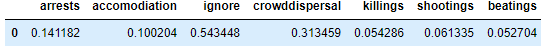

- Our approach to account for these imbalances and predict state responses can be broken down into a couple of models. 
    1. One model is going to predict when a state ignores a protest.
    2. The other model is going to predict the rest of the state responses using the data without instances when the state
    response is not ignore. 


In [13]:

frequencies = {
    'arrests':[mass_no_country['arrests'].value_counts(normalize=True)[1]],
    'accomodation' : [mass_no_country['accomodation'].value_counts(normalize=True)[1]],
    'ignore' : [mass_no_country['ignore'].value_counts(normalize=True)[1]],
    'crowddispersal' : [mass_no_country['crowddispersal'].value_counts(normalize=True)[1]], 
    'killings' : [mass_no_country['killings'].value_counts(normalize=True)[1]], 
    'shootings' : [mass_no_country['shootings'].value_counts(normalize=True)[1]], 
    'beatings' : [mass_no_country['beatings'].value_counts(normalize=True)[1]]
}

pd.DataFrame(frequencies)

,arrests,accomodation,ignore,crowddispersal,killings,shootings,beatings
0,0.141182,0.100204,0.543448,0.313459,0.054286,0.061335,0.052704


### Logistic Regression for when the State ignores protests 

In [14]:
# results = {
#     'target' : [],
#     'best_cv_scores' : [],
#     'best_params' : [],
#     'AUC_train_score' : [],
#     'AUC_test_score' : [],
#     'train_f1_scores' : [],
#     'test_f1_scores' : [],
#     'train_precision_scores' : [], 
#     'test_precision_scores' : [],
#     'train_recall_scores' : [],
#     'test_recall_scores' : []
# }

# targets = ['ignore']
    
# features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
#        'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
#        'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female',
#        'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response','partipants_number'])

# for target in targets: 

#     X = features
#     y = mass_no_country[target]

#     logreg = LogisticRegression(multi_class='ovr')

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

#     ss = StandardScaler()
#     X_train_sc = ss.fit_transform(X_train)
#     X_test_sc = ss.transform(X_test)
    
#     params = {
#     'penalty' : ['l1','l2'], 
#     'C' : [.01],
#     'solver' : ['liblinear', 'saga'],
#     'max_iter' : [100, 1000],
#     #'class_weight' : [{1:0, 8:1}, {1:0, 1:8}]
#     }

#     grid = GridSearchCV(
#         logreg, param_grid=params, cv=10, verbose=2, 
#         scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
#         refit='AUC', 
#         return_train_score=True
#     )
        
#     # fit grids
#     grid.fit(X_train_sc, y_train)    
    
#     results['target'].append(targets)

#     # append important grid results
#     results['best_params'].append(grid.best_params_)
#     results['best_cv_scores'].append(grid.best_score_)

#     # make predictions 
#     train_preds = grid.predict(X_train_sc)
#     test_preds = grid.predict(X_test_sc)

#     # various classification metrics
#     # AUC scores 
#     results['AUC_train_score'].append(roc_auc_score(y_train, train_preds))
#     results['AUC_test_score'].append(roc_auc_score(y_test, test_preds))

#     # f1 scores
#     results['train_f1_scores'].append(f1_score(y_train, train_preds))
#     results['test_f1_scores'].append(f1_score(y_test, test_preds))

#     # precision scores 
#     results['train_precision_scores'].append(precision_score(y_train, train_preds))
#     results['test_precision_scores'].append(precision_score(y_test, test_preds))

#     # recall scores
#     results['train_recall_scores'].append(recall_score(y_train, train_preds))
#     results['test_recall_scores'].append(recall_score(y_test, test_preds))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1,

In [15]:
# results_df = pd.DataFrame(results)
# results_df

,target,best_cv_scores,best_params,AUC_train_score,AUC_test_score,train_f1_scores,test_f1_scores,train_precision_scores,test_precision_scores,train_recall_scores,test_recall_scores
0,[ignore],0.787453,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",0.720819,0.719727,0.786029,0.790331,0.70082,0.700839,0.894825,0.906024


## Logistic Regression for when the government does respond 

Now that we have a model that predicts when the government does respond, we want to predict when the government does not ignore protests. 

In [22]:
# create df without ignore 
gov_response = mass_no_country[mass_no_country['ignore'] == 0]
gov_response.head(2)

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration,violent_response
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711,57,0
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267,2,0


In [23]:
# look at imbalances of gov_responses df 
gov_response_frequencies = {
    'arrests':[gov_response['arrests'].value_counts(normalize=True)[1]],
    'accomodation' : [gov_response['accomodation'].value_counts(normalize=True)[1]],
    'crowddispersal' : [gov_response['crowddispersal'].value_counts(normalize=True)[1]], 
    'killings' : [gov_response['killings'].value_counts(normalize=True)[1]], 
    'shootings' : [gov_response['shootings'].value_counts(normalize=True)[1]], 
    'beatings' : [gov_response['beatings'].value_counts(normalize=True)[1]]
}

pd.DataFrame(gov_response_frequencies)

,arrests,accomodation,crowddispersal,killings,shootings,beatings
0,0.301154,0.192208,0.67013,0.116162,0.131313,0.111977


In [29]:
results = {
    'target' : [],
    'best_cv_scores' : [],
    'best_params' : [],
    'AUC_train_score' : [],
    'AUC_test_score' : [],
    'train_f1_scores' : [],
    'test_f1_scores' : [],
    'train_precision_scores' : [], 
    'test_precision_scores' : [],
    'train_recall_scores' : [],
    'test_recall_scores' : []
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


#targets = ['crowddispersal','beatings', 'shootings', 'killings','violent_response']  
targets = ['arrests']  

features = gov_response.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female',
       'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response','partipants_number'])


for target in targets: 

    X = features
    y = gov_response[target]
    
    logreg = LogisticRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    params = {
    'penalty' : ['l1','l2'], 
    'C' : [.001, .01],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100, 1000],
    'class_weight' : [{1:0, 1:3.3}, {1:0, 1:5}, {1:0, 1:1}, {1:0,1:8.33}]
    }

    grid = GridSearchCV(
        logreg, param_grid=params, cv=10, verbose=2, 
        scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
        refit='AUC', 
        return_train_score=True
    )

    # fit grids
    grid.fit(X_train_sc, y_train)
    
        
    # save the model to disk
    model_file = f'./models/04_no_ignore_{target}.pickle'
    pickle.dump(grid, open(model_file, 'wb'))
    
    results['target'].append(target)

    # append important grid results
    results['best_params'].append(grid.best_params_)
    results['best_cv_scores'].append(grid.best_score_)

    # make predictions 
    train_preds = grid.predict(X_train_sc)
    test_preds = grid.predict(X_test_sc)

    # various classification metrics
    # AUC scores 
    results['AUC_train_score'].append(roc_auc_score(y_train, train_preds))
    results['AUC_test_score'].append(roc_auc_score(y_test, test_preds))

    # f1 scores
    results['train_f1_scores'].append(f1_score(y_train, train_preds))
    results['test_f1_scores'].append(f1_score(y_test, test_preds))

    # precision scores 
    results['train_precision_scores'].append(precision_score(y_train, train_preds))
    results['test_precision_scores'].append(precision_score(y_test, test_preds))

    # recall scores
    results['train_recall_scores'].append(recall_score(y_train, train_preds))
    results['test_recall_scores'].append(recall_score(y_test, test_preds))

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; tota

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penal

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, pena

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   2.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [19]:
results_df = pd.DataFrame(results)
results_df

,target,best_cv_scores,best_params,AUC_train_score,AUC_test_score,train_f1_scores,test_f1_scores,train_precision_scores,test_precision_scores,train_recall_scores,test_recall_scores
0,accomodation,0.725600,"{'C': 0.01, 'class_weight': {1: 3.3}, 'max_ite...",0.667702,0.656146,0.447378,0.417740,0.363689,0.327354,0.581094,0.577075
1,crowddispersal,0.726764,"{'C': 0.01, 'class_weight': {1: 1}, 'max_iter'...",0.610382,0.600093,0.804345,0.800578,0.727352,0.731514,0.899568,0.884043
2,beatings,0.684020,"{'C': 0.01, 'class_weight': {1: 8.33}, 'max_it...",0.653017,0.624321,0.287923,0.268068,0.179952,0.168317,0.719807,0.658065
3,shootings,0.792876,"{'C': 0.01, 'class_weight': {1: 8.33}, 'max_it...",0.723344,0.685700,0.376891,0.344486,0.241942,0.221338,0.852257,0.776536
4,killings,0.779378,"{'C': 0.01, 'class_weight': {1: 8.33}, 'max_it...",0.720181,0.691660,0.350052,0.345781,0.224291,0.226040,0.796850,0.735294


In [20]:
# best hyperparams
results['best_params']

[{'C': 0.01,
  'class_weight': {1: 3.3},
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'liblinear'},
 {'C': 0.01,
  'class_weight': {1: 1},
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'saga'},
 {'C': 0.01,
  'class_weight': {1: 8.33},
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'saga'},
 {'C': 0.01,
  'class_weight': {1: 8.33},
  'max_iter': 100,
  'penalty': 'l1',
  'solver': 'liblinear'},
 {'C': 0.01,
  'class_weight': {1: 8.33},
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'liblinear'}]

## Results and Evaluation